In [314]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

`
Has the network latency gone up since we switched internet service providers?
Is the website redesign any good?
Is our television ad driving more sales?
`


Has switching providers increased latency in the network?

* H0: Switching providers did not increase latency.   
    * Type 1: (boy is alive, no wolf, people came). False positive/The p-value is < alpha indicating low confidence and resulting a false positive.
* HA: We are 95% confident that switching providers has increased latency in our network.
    * Type 2: (boy is dead, wolf is present, people don't come). False negative/The p-value is > (?) alpha indicating over confidence that switching providers caused the latency. Latency problem still exists outside of this sample!

Has redesigning the website lead to increased _measurable (efficiency, UI, speed)_ in place of 'good'?

* H0: Redesigning the website has not improved _measurable_.
    * Type 1: (False Positive). The sample data grabbed provided false confidence that the site redesign/_measurable_ relationship is valid.

* HA: Redesigning the website has improved _measurable_.
    * Type 2: (False Negative). The sample data grabbed provided a false LACK of confidence that the relationship between site redesign and _measurable_ value is significant.

Has the television ad increased sales?

* H0: Television ad does not increase sales.
    * Type 1: (False Positive). Relationship between increased sales and television ad is deemed significant when it is in fact, weak.

* HA: The television ad did increase sales.
    * Type 2: (False Negative). The relationship between the ad and sales is deemed insignificant; when it is, in fact, significant. Boy is dead. Wolf is present. People don't come to help.

# Comparison of Means

Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

    `* Bubble in a bubble, one-sample two-tailed test`
    
* Are adults who drink milk taller than adults who dont drink milk?

    `* Two bubbles, independent (can't be both), greater than for height: I would use a two-sample one-tailed test`
    
* Is the the price of gas higher in texas or in new mexico?

    `* Two bubbles, two-sample one-tailed test`
    
* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

    `* More than 2 groups, ANOVA. two-tailed ANOVA test to determine IF there is a difference`

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [199]:
office1_m = 90
office1_sd = 15
office2_m = 100
office2_sd = 20
alpha = 0.05
n1=40
n2=50

In [200]:
df1 = pd.DataFrame(np.random.normal(office1_m, office1_sd, size=n1))
df2 = pd.DataFrame(np.random.normal(office2_m, office2_sd, size=n2))

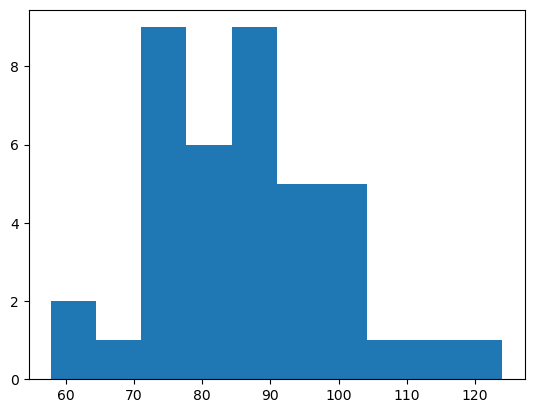

In [201]:
plt.hist(df1)
plt.show()

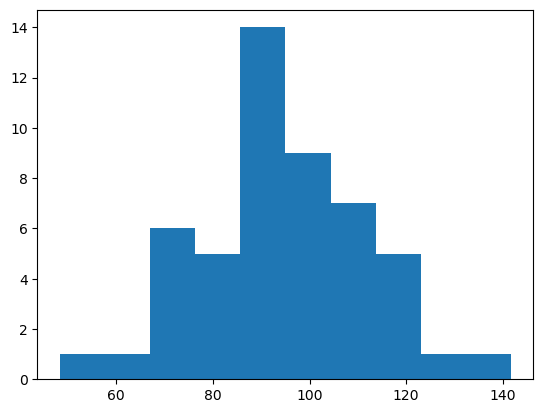

In [202]:
plt.hist(df2)
plt.show()

$H_{0}$ : There is not a difference in the average sale time between office 1 and office 2.

$H_{a}$ : There is a difference in the average sale time between office 1 and office 2.

Assumptions: Not normal, 40 observations (low but valid)

In [217]:
df1.var(), df2.var()

(0    194.277897
 dtype: float64,
 0    312.34006
 dtype: float64)

In [203]:
tstat, pval = stats.ttest_ind(df1, df2)
tstat, pval

(array([-2.43669174]), array([0.01683624]))

Difference significant, reject the null hypothesis

## Andrew's Way

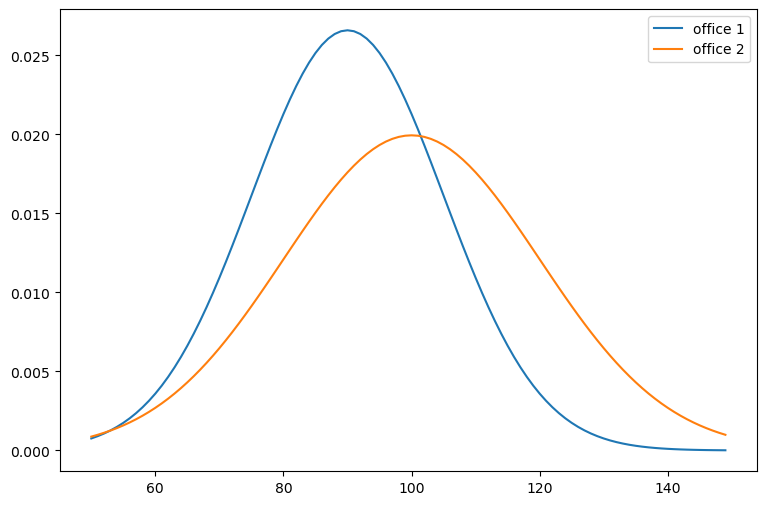

In [198]:
x = np.arange(50,150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize = (9,6))
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.legend()
plt.show()

In [207]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [209]:
alpha = 0.05

In [210]:
stat, pval = stats.levene(office_1, office_2)
stat, pval

(4.102881044795635, 0.04583970992058288)

In [211]:
tstat, pval = stats.ttest_ind(office_1, office_2, equal_var=False)
tstat, pval

(-2.024085067738832, 0.04602940643130389)

In [212]:
if pval < alpha:
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Reject the Null


Barely significant result, can reject the null hypothesis

## IND_FROM_STATS

In [220]:
# only works for two different datasets where you don't have the 
# data to back it up, just the mean, sd, and sample size
stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

Significant, reject the null

## MPG

Load the mpg dataset and use it to answer the following questions:

* Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

    * two tail, two sample

$H_{0}$ = There is no difference in efficiency in cars from 2008 vs 1999

$H_{a}$ = There is a difference in efficiency in cars from 2008 vs 1999


There are different types of mean!

Arithmatic Mean : The one we know and love

Harmonic Mean : Things over time, something over a duration, miles per hour (stats.hemean())

Geometric Mean : ??

In [315]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [72]:
mpg.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [222]:
mpg['avg_mileage'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)

In [224]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [639]:
theoretical_mean = mpg.avg_mileage
theoretical_mean

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: avg_mileage, Length: 234, dtype: float64

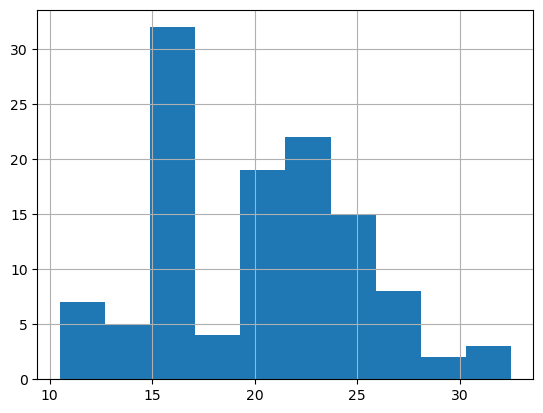

In [640]:
avg_08 = mpg[mpg.year == 2008].avg_mileage
avg_08.hist()
plt.show()

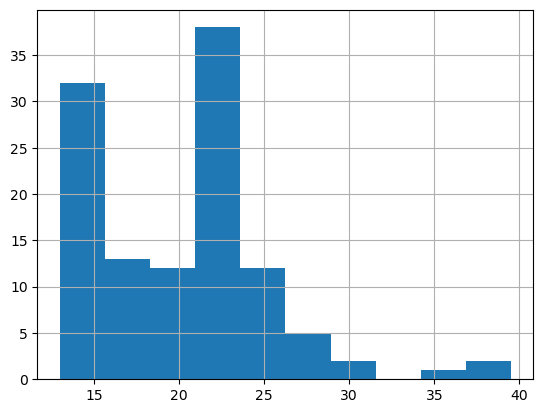

In [641]:
avg_99 = mpg[mpg.year == 1999].avg_mileage
avg_99.hist()
plt.show()

### Variance True?

In [642]:
stats.levene(avg_08, avg_99) # TRUE! p > a

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [665]:
tstat, pval = stats.f_oneway(theoretical_mean, avg_08, avg_99)
tstat, pval

(0.02416192453949675, 0.9761288633675747)

In [666]:
tstat, pval = stats.ttest_ind(avg_08, avg_99)
tstat, pval

(-0.21960177245940962, 0.8263744040323578)

In [645]:
if pval < alpha:
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Fail to Reject the Null


In [675]:
def conclude_anova(theoretical_mean, group1, group2):
    α = 0.05
    tstat, pval = stats.f_oneway(theoretical_mean, group1, group2)
    print(f'stat')
    print(tstat)
    print(f'P-Value')
    print(pval)
    print('----')
    if pval < α:
        print("We can reject the null hypothesis.")
    else:
        print('We fail to reject the null hypothesis.')

In [676]:
conclude_anova(theoretical_mean, avg_08, avg_99)

stat
0.02416192453949675
P-Value
0.9761288633675747
----
We fail to reject the null hypothesis.


* Are compact cars more fuel-efficient than the average car?
    * one-sample, one-tail test

$H_{0}$ = compact cars do not have greater fuel efficiency against the avg car

$H_{a}$ = compact cars do have greater fuel efficiency against the avg car

In [579]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [580]:
mpg[['class']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   234 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [588]:
mpg['avg_mileage'] = (mpg.hwy + mpg.cty) / 2
mpg[['avg_mileage']]

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: avg_mileage, Length: 234, dtype: float64

In [589]:
mpg[['avg_mileage']]

,avg_mileage
1,23.5
2,25.0
3,25.5
4,25.5
5,21.0
...,...
230,23.5
231,25.0
232,21.0
233,22.0


In [604]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage,compact_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,21.0


In [606]:
mpg['over_avg'] = mpg.avg_mileage
mpg.over_avg

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: over_avg, Length: 234, dtype: float64

In [599]:
mpg['compact_avg'] = mpg[mpg['class'] == 'compact'].avg_mileage
mpg.compact_avg

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230     NaN
231     NaN
232     NaN
233     NaN
234     NaN
Name: compact_avg, Length: 234, dtype: float64

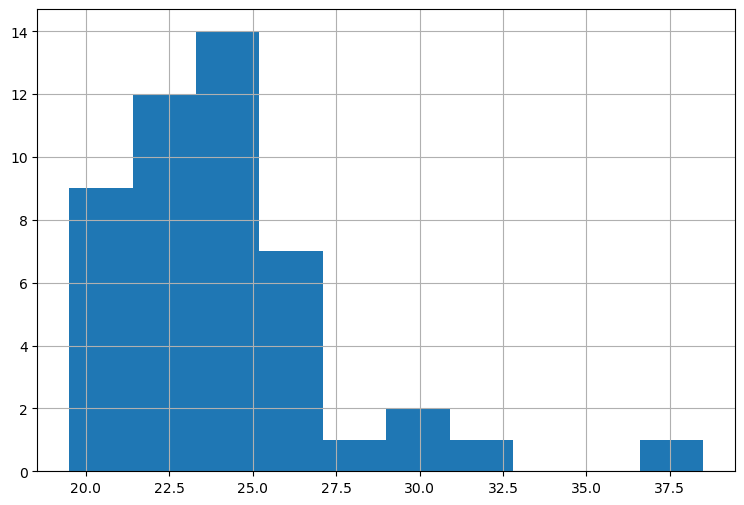

In [600]:
plt.figure(figsize=(9,6))
compact_avg.hist()
plt.show()

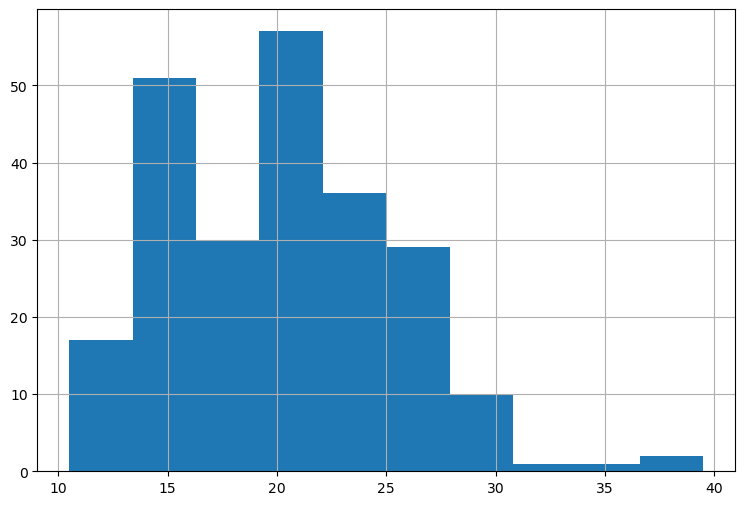

In [601]:
plt.figure(figsize=(9,6))
over_avg.hist()
plt.show()

In [611]:
tstat, pval = stats.ttest_1samp(compact_avg, over_avg.mean())
tstat, (pval/2)

(7.896888573132533, 2.0992818971585816e-10)

In [612]:
compact_avg.mean(), over_avg.mean()

(24.21276595744681, 20.14957264957265)

In [613]:
if ((pval < alpha) and (tstat > 0)):
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Reject the Null


* Do manual cars get better gas mileage than automatic cars?
    * two sample, one-tail

$H_{0}$ = manual cars do not have greater fuel efficiency against automatic cars

$H_{a}$ = manual cars do have greater fuel efficiency against automatic cars

In [106]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [176]:
auto_car = mpg[mpg.trans.str.contains('auto')].avg_mileage

In [177]:
manual_car = mpg[mpg.trans.str.contains('manual')].avg_mileage

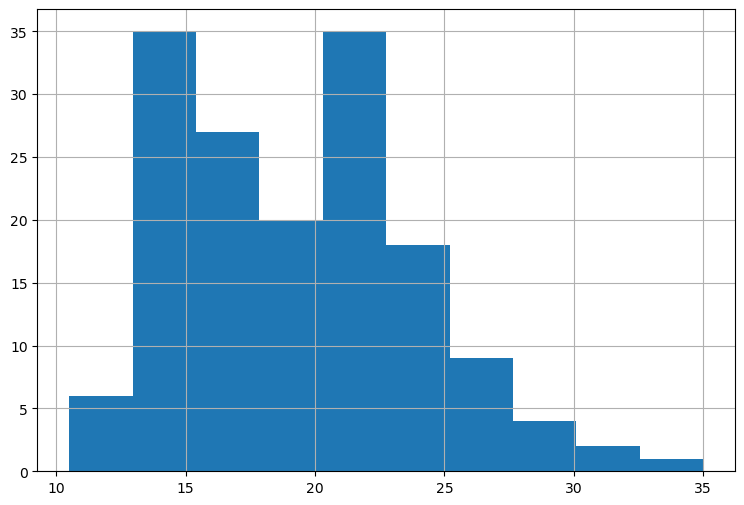

In [272]:
plt.figure(figsize=(9,6))
auto_car.hist()
plt.show()

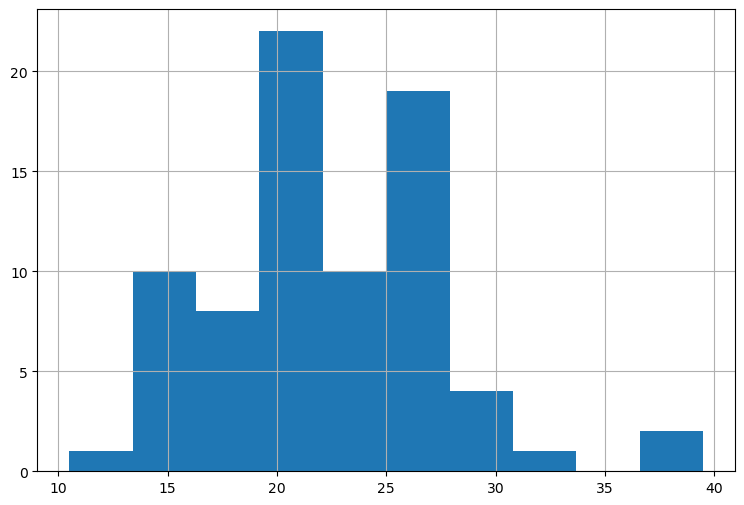

In [273]:
plt.figure(figsize=(9,6))
manual_car.hist()
plt.show()

## Variance Check because TWO SAMPLE

In [275]:
stats.levene(auto_car, manual_car) # p > a, TRUE!

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [276]:
tstat, pval = stats.ttest_ind(auto_car, manual_car)
tstat, pval/2

(-4.593437735750014, 3.5771872005728416e-06)

In [277]:
if ((pval < alpha) and (tstat < 0)):
    print('Reject the Null')
else:
    print('Fail to Reject the Null')

Reject the Null


# Correlation

Answer with the type of stats test you would use (assume normal distribution):
* Is there a relationship between the length of your arm and the length of your foot?
    * Var. 1 = Len(arm)
    * Var. 2 = Len(foot)
        * Pearson or Spearman
    * correlation test
* Do guys and gals quit their jobs at the same rate?
    * Var. 1 = Gender
    * Var. 2 = Quit Rate
    * comparison of means t-test: two-sample two-tailed
* Does the length of time of the lecture correlate with a students grade?
    * correlation test

Use the telco_churn data.
* Does tenure correlate with monthly charges?


> can also save the data as a CSV and call it that way

In [41]:
url_telco = f'mysql+pymysql://{username}:{password}@{host}/telco_churn'

In [45]:
df = pd.read_sql('select * from customers', url_telco)

In [252]:
df.total_charges = pd.to_numeric(df['total_charges'], errors='coerce')

TypeError: to_numeric() got an unexpected keyword argument 'dropna'

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7032 non-null   float64
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [112]:
# make a new column called tenure
df['tenure'] = df.total_charges/df.monthly_charges
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9.044207,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,9.055092,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,3.800406,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,12.631122,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3.187128,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13.470535,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.90,No
7039,9992-RRAMN,Male,0,Yes,No,22.017626,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.70,Yes
7040,9992-UJOEL,Male,0,No,No,1.843936,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,68.204127,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [279]:
# sort values in tenure and then replace the blanks with 0 as a 
# float to cover the customers who have not been with the company for a whole month

## Determine the appropriate test

In [92]:
df.tenure.head()

0     9.0
1     9.0
2     4.0
3    13.0
4     3.0
Name: tenure, dtype: float64

In [74]:
df.monthly_charges.head()

0    65.6
1    59.9
2    73.9
3    98.0
4    83.9
Name: monthly_charges, dtype: float64

## Setup

$H_0$: There is no linear relationship between tenure and monthly charges

$H_a$: There is a linear relationship between tenure and monthly charges

In [75]:
alpha = 0.05

## Visualize

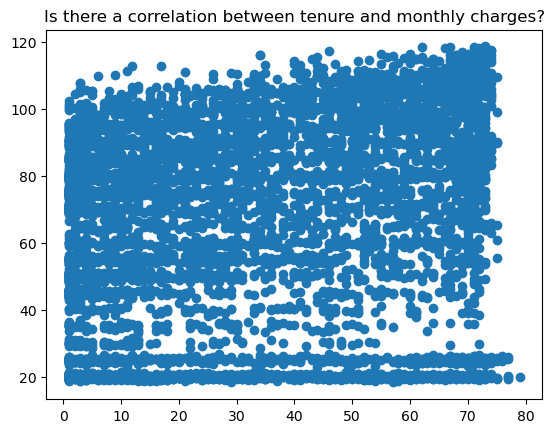

In [82]:
plt.scatter(df.tenure, df.monthly_charges)
plt.title('Is there a correlation between tenure and monthly charges?')
plt.show()

### Amanda's Way to Plot

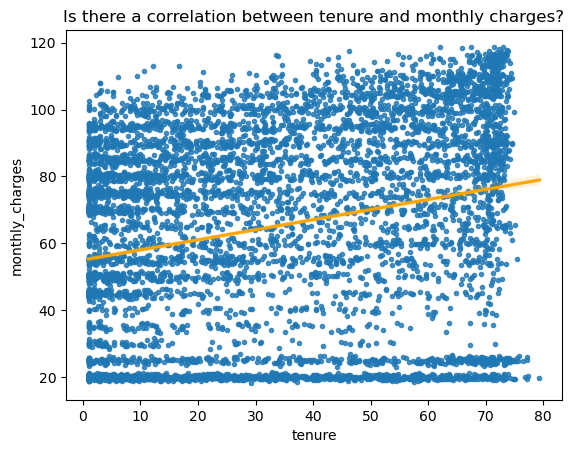

In [255]:
sns.regplot(x=df.tenure, y=df.monthly_charges, marker='.', line_kws={'color':'orange'})
plt.title('Is there a correlation between tenure and monthly charges?')
plt.show()

### Amanda's test for distributions

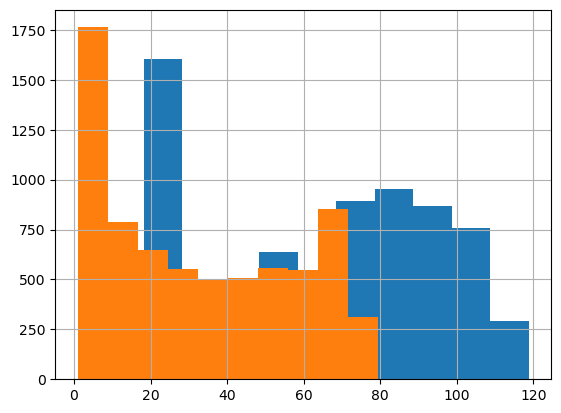

In [257]:
df.monthly_charges.hist()
df.tenure.hist()
plt.show()

DEPICTS not normal distribution

In [269]:
def eval_dist(r, p, α=0.05):
    if p > α:
        return print(f"The data is normally distributed.")
    else:
        return print(f"The data is not normally distributed.")

In [270]:
from scipy.stats import shapiro

In [271]:
r, p = stats.shapiro(df.monthly_charges)
r, p

(0.9208890199661255, 0.0)

In [272]:
eval_dist(r,p)

The data is not normally distributed.


In [273]:
r, p = stats.shapiro(df.tenure.dropna())
r, p

(0.9069033265113831, 0.0)

In [274]:
eval_dist(r,p)

The data is not normally distributed.


## Calculate t-stat and pvalue

In [118]:
r, p = stats.pearsonr(df.tenure.isnull().dropna(), df.monthly_charges)
r, p
print(f'{r} implies a negative relationship, {p.round(4)} < {alpha}')

-0.030685347668579954 implies a negative relationship, 0.01 < 0.05


## Conclude

In [119]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Does tenure correlate with total charges?

In [120]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9.044207,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9.055092,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,3.800406,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,12.631122,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3.187128,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


## Determine the appropriate test

In [121]:
df.tenure.head(), df.total_charges.head()

(0     9.044207
 1     9.055092
 2     3.800406
 3    12.631122
 4     3.187128
 Name: tenure, dtype: float64,
 0     593.30
 1     542.40
 2     280.85
 3    1237.85
 4     267.40
 Name: total_charges, dtype: float64)

## Setup

$H_0$: There is no linear relationship between tenure and total charges

$H_a$: There is a linear relationship between tenure and total charges

In [122]:
alpha

0.05

## Visualize

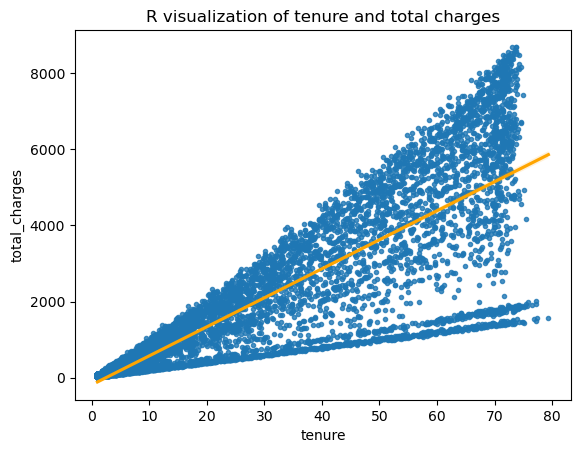

In [280]:
sns.regplot(x=df.tenure, y=df.total_charges, marker='.', line_kws={'color':'orange'})
plt.title('R visualization of tenure and total charges')
plt.show()

## Calculate the r and p

In [127]:
r, p = stats.pearsonr(df.tenure.isnull().dropna(), df.total_charges.isnull().dropna())
r, p 

(0.9999999999999987, 0.0)

## Conclude

In [128]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### What happens if you control for phone and internet service?

## Determine the appropriate test

In [156]:
df.internet_service_type_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: internet_service_type_id
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [155]:
df.internet_service_type_id  = df[['internet_service_type_id']]\
.replace(1,'Yes').replace(2,'Yes').replace(3,'No')

In [160]:
df.tenure.head(), df.phone_service.head(), df.internet_service_type_id.head()

(0     9.044207
 1     9.055092
 2     3.800406
 3    12.631122
 4     3.187128
 Name: tenure, dtype: float64,
 0    Yes
 1    Yes
 2    Yes
 3    Yes
 4    Yes
 Name: phone_service, dtype: object,
 0    Yes
 1    Yes
 2    Yes
 3    Yes
 4    Yes
 Name: internet_service_type_id, dtype: object)

## Setup

$H_0$: There is no linear relationship between tenure and monthly charges

$H_a$: There is a linear relationship between tenure and monthly charges

In [161]:
alpha

0.05

## Visualize

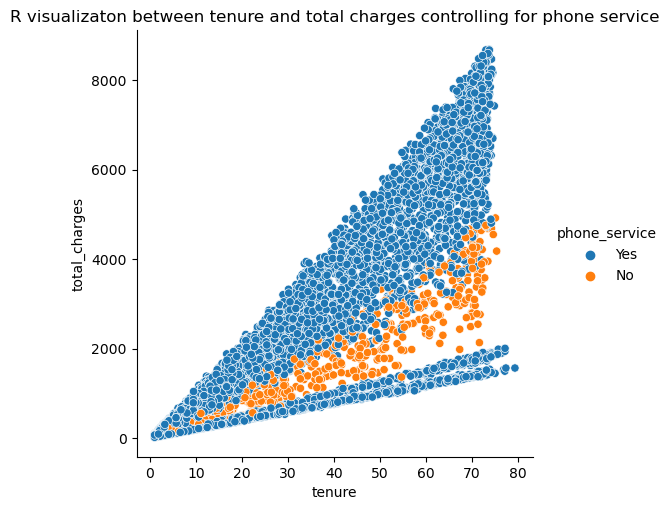

In [173]:
sns.relplot(x=df.tenure, y=df.total_charges, hue=df.phone_service)
plt.title('R visualizaton between tenure and total charges controlling for phone service')
plt.show()

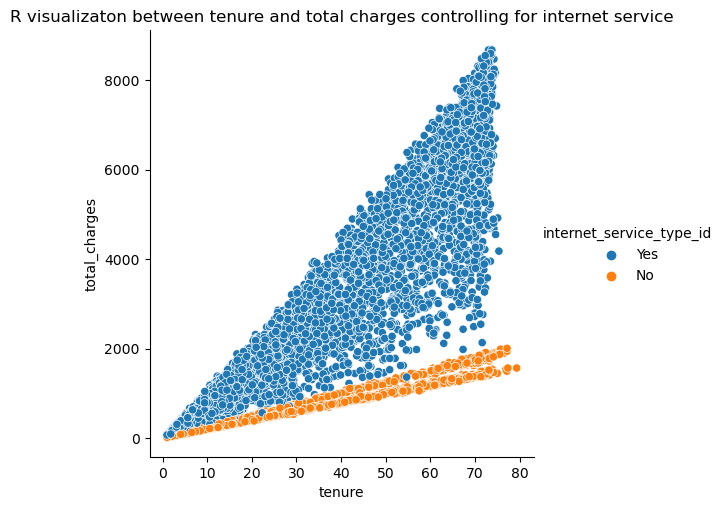

In [172]:
sns.relplot(x=df.tenure, y=df.total_charges, hue=df.internet_service_type_id)
plt.title('R visualizaton between tenure and total charges controlling for internet service')
plt.show()

## Calculate tstat and p

In [190]:
#create separate dfs for phone and internet
phone = df [df.phone_service == 'Yes'] 
internet = df [df.internet_service_type_id == 'Yes']

In [281]:
r_phone, p_phone = stats.spearmanr(phone.tenure.dropna(), phone.total_charges.dropna())
r_phone, p_phone

(0.8865068772795377, 0.0)

In [282]:
r_internet, p_internet = stats.spearmanr(internet.tenure.dropna(), internet.total_charges.dropna())
r_internet, p_internet

(0.9595440236541904, 0.0)

## Conclude

In [283]:
#evaluate p-value
if p_phone < alpha:
    print("We reject the null hypothesis for controlling by phone")
else:
    print("We fail to reject the null hypothesis")

#evaluate p-value
if p_internet < alpha:
    print("We reject the null hypothesis for controlling by internet")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis for controlling by phone
We reject the null hypothesis for controlling by internet


Use the employees database.
* Is there a relationship between how long an employee has been with the company and their salary?

In [23]:
def get_connection(db, user=env.username, host=env.host, password=env.password):
    url = f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [28]:
get_connection('employees')

In [425]:
url_emp = f'mysql+pymysql://{username}:{password}@{host}/employees'

In [199]:
tenure = pd.read_sql('''select sum(datediff(to_date, from_date)) as tenure, emp_no
from salaries where to_date < '9999-01-01'
group by emp_no
''', url_emp)

In [200]:
tenure.head()

,tenure,emp_no
0,5840.0,10001
1,1825.0,10002
2,2190.0,10003
3,5475.0,10004
4,4380.0,10005


In [201]:
avg_sal = pd.read_sql('''select emp_no, round(avg(salary),2)
from salaries
where (	select sum(datediff(to_date, from_date)) as tenure
		from (select to_date, from_date from salaries where to_date < '9999-01-01') as a)
group by emp_no''', url_emp)

In [203]:
avg_sal.head()

,emp_no,"round(avg(salary),2)"
0,10001,75388.94
1,10002,68854.50
2,10003,43030.29
3,10004,56512.25
4,10005,87275.77


In [209]:
df2 = pd.merge(left=avg_sal, right=tenure, on='emp_no')
df2.head()

,emp_no,"round(avg(salary),2)",tenure
0,10001,75388.94,5840.0
1,10002,68854.50,1825.0
2,10003,43030.29,2190.0
3,10004,56512.25,5475.0
4,10005,87275.77,4380.0


## Determine the appropriate test

In [215]:
avg_sal['round(avg(salary),2)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300024 entries, 0 to 300023
Series name: round(avg(salary),2)
Non-Null Count   Dtype  
--------------   -----  
300024 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [217]:
tenure['tenure'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300024 entries, 0 to 300023
Series name: tenure
Non-Null Count   Dtype  
--------------   -----  
300024 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [210]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   emp_no                300024 non-null  int64  
 1   round(avg(salary),2)  300024 non-null  float64
 2   tenure                300024 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.2 MB


## Setup

$H_0$: There is no relationship between tenure and salary

$H_a$: There is a relationship between tenure and salary

In [211]:
alpha

0.05

## Visualize

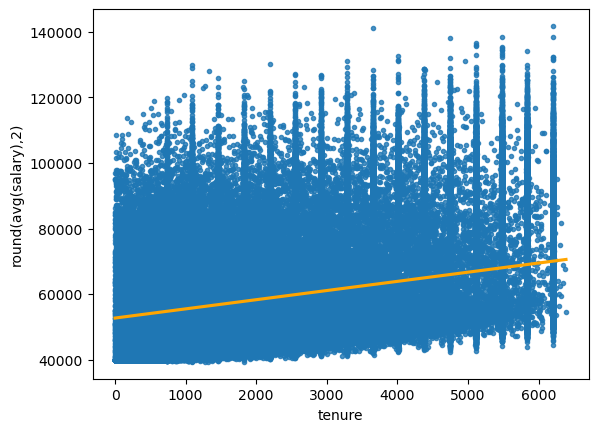

In [285]:
sns.regplot(x=tenure['tenure'] , y=avg_sal['round(avg(salary),2)'], marker='.', line_kws={'color':'orange'})
plt.show()

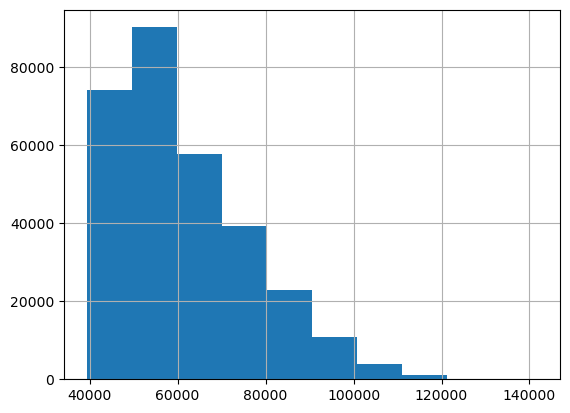

In [288]:
avg_sal['round(avg(salary),2)'].hist()
plt.show()

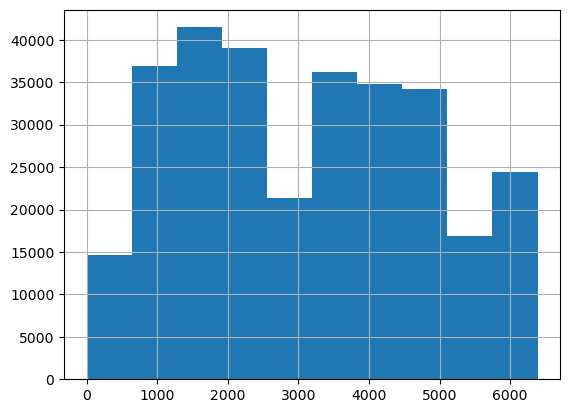

In [290]:
tenure.tenure.hist()
plt.show()

## Calculate r and p

In [250]:
r, p = stats.pearsonr(tenure.tenure, avg_sal['round(avg(salary),2)'])
r, p

(0.3106088067600041, 0.0)

In [248]:
r, p = stats.spearmanr(tenure.tenure, avg_sal['round(avg(salary),2)'])
r, p

(0.35699515855728914, 0.0)

In [249]:
# evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

## Determine the appropriate test

In [228]:
num_titles = pd.read_sql('''select emp_no, count(dept_no) as num_titles
from dept_emp
group by emp_no
''', url_emp)

In [296]:
num_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      300024 non-null  int64
 1   num_titles  300024 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


In [297]:
tenure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tenure  300024 non-null  float64
 1   emp_no  300024 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 4.6 MB


## Setup

> USE ANOVA, CHECK FOR VARIANCE, VARIANCE FAILS, USE KRUSKAL WALLIS TEST

$H_0$: There is no relationship between tenure and number of titles

$H_a$: There is a relationship between tenure and number of titles

In [232]:
alpha

0.05

## Visualize

In [244]:
n_t = pd.merge(num_titles,tenure, on='emp_no').drop(columns='emp_no')
n_t

,num_titles,tenure
0,1,5840.0
1,1,1825.0
2,1,2190.0
3,1,5475.0
4,1,4380.0
...,...,...
300019,1,1825.0
300020,1,2190.0
300021,1,5110.0
300022,1,2920.0


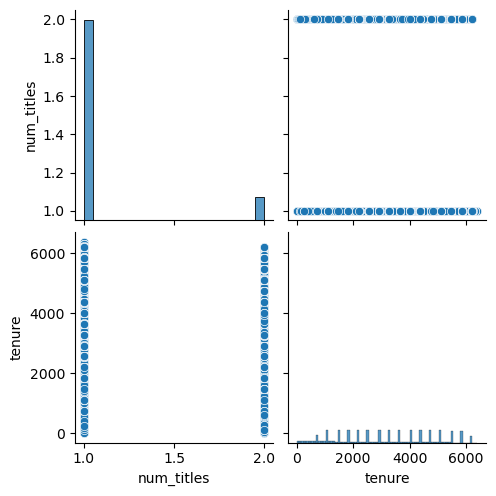

In [245]:
sns.pairplot(n_t)
plt.show()

## Calculate r and p

In [246]:
r, p = stats.pearsonr(num_titles.num_titles,tenure.tenure)
r, p

(-0.0030283568645025185, 0.09716363830673562)

## Conclude

In [300]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Use the sleepstudy data.
* Is there a relationship between days and reaction time?

In [302]:
from pydataset import data
dfs = data('sleepstudy')

In [303]:
dfs.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [305]:
df_react = dfs[['Reaction', 'Days']]

In [307]:
df_react.head()

,Reaction,Days
1,249.5600,0
2,258.7047,1
3,250.8006,2
4,321.4398,3
5,356.8519,4


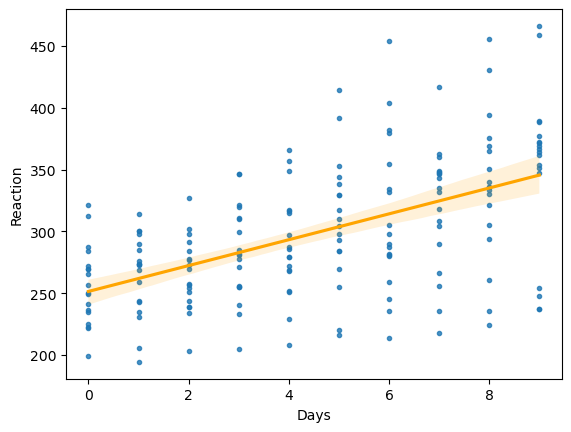

In [309]:
sns.regplot(x=df_react['Days'], y=df_react['Reaction'], marker='.',line_kws={'color':'orange'})
plt.show()

The data suggests that days are discrete and reaction is continous

    * How do we treat the day variables?
    * 2/3 days would default to t-test
    * Greater than 2/3 bring in Correlation?

In [310]:
r, p = stats.spearmanr(df_react.Days, df_react.Reaction)
r, p 

(0.5228138502259547, 5.132878057706873e-14)

In [311]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Reject the null hypothesis, there is significance in the relationship between days and reaction time

# Comparison of Groups

Answer with the type of stats test you would use (assume normal distribution):

* Do students get better test grades if they have a rubber duck on their desk?
    * chi2/ttest (test grades = coninuous, rubber duck = categorical)
* Does smoking affect when or not someone has lung cancer?
    * chi2 (yes/no for all categories)
* Is gender independent of a person’s blood type?
    * chi2 (two groups)
* A farming company wants to know if a new fertilizer has improved crop yield or not
    * ttest (categorical and continous)
* Does the length of time of the lecture correlate with a students grade?
    * correlation (continous to continous)
* Do people with dogs live in apartments more than people with cats?
    * chi2 (yes/no for all categories)

discrete - discrete = chi 2

discrete - continouts = means test

continous - continous = correlation

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

	Codeup Student	Not Codeup Student
Uses a Macbook	`49`	`20`

Doesn't Use A Macbook	`1`	`30`

$H_O$: There is no association between being a Codeup Student and using a Mac

$H_a$: There is an associaton with being a Codeup Student and using a Mac

In [481]:
# made a temp table and tried to call into mysql -- didn't work :(
url_pagel_2182 = f'mysql+pymysql://{username}:{password}@{host}/pagel_2182'

In [480]:
pd.read_sql('''select *
from codeup_ct4''', url_pagel_2182)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'pagel_2182.codeup_ct4' doesn't exist")
[SQL: select *
from codeup_ct4]
(Background on this error at: https://sqlalche.me/e/14/f405)

### Make a DF with the values that we already have!

In [483]:
observed = [[49, 20], [1, 30]]
observed

[[49, 20], [1, 30]]

In [493]:
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [496]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [497]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [498]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [316]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact



## Plot distributions

`An internal-combustion engine's displacement is the combined volume of air moved — or displaced — by the pistons in its cylinders.`

In [397]:
mpg.cty.info()

<class 'pandas.core.series.Series'>
Int64Index: 234 entries, 1 to 234
Series name: cty
Non-Null Count  Dtype
--------------  -----
234 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [413]:
mpg.displ.info()

<class 'pandas.core.series.Series'>
Int64Index: 234 entries, 1 to 234
Series name: displ
Non-Null Count  Dtype  
--------------  -----  
234 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


## Establish Hypothesis

$H_O$: There is no relationship between displacement and city mileage

$H_a$: There is a relationship between displacement and city mileage

In [345]:
alpha=0.05

## Verify Assumptions

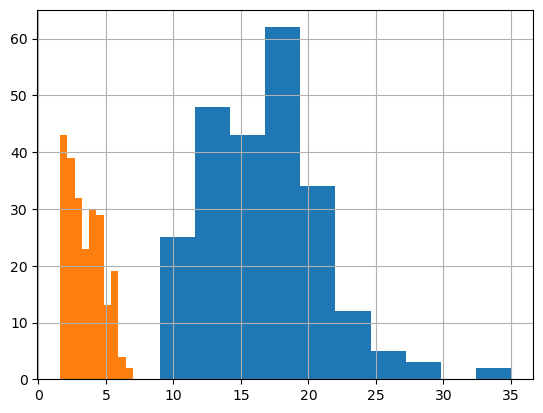

In [418]:
mpg.cty.hist()
mpg.displ.hist()
plt.show()

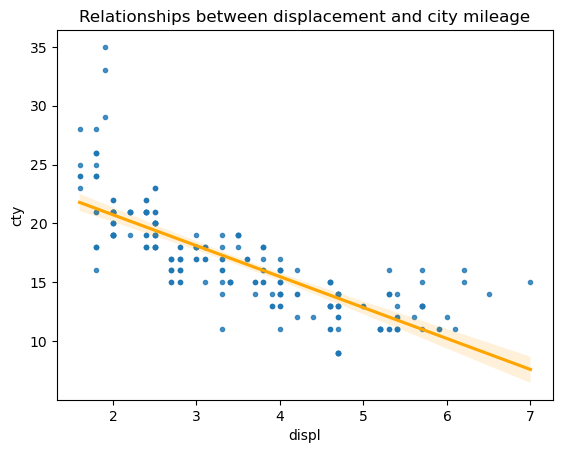

In [410]:
sns.regplot(x=mpg['displ'], y=mpg['cty'], marker='.', line_kws={'color':'orange'})
plt.title('Relationships between displacement and city mileage')
plt.show()

## Compute

In [505]:
r, p = stats.spearmanr(mpg.cty, mpg.displ)
r, p 

(-0.8809048988141385, 2.5322712028933308e-77)

In [506]:
observed = pd.crosstab(mpg.cty, mpg.displ)

In [507]:
chi2, pval, degf, expected = stats.chi2_contingency(observed)

In [508]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'pval     = {pval:.4f}')

Observed
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 2 1 0 5 2 4 0 1 2 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 2 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 5 4 2 0 0 1 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 4 2 0 0 5 0 0 3 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 2 2 0 1 1 4 0 0 2 2 0 3 0 0 4 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 3 3 0 0 2 0 0 0 0 2 0 4 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 3 3 2 2 2 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 3 5 0 2 5 3 1 0 1 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 1 2 4 0 0 1 0 1 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 8 5 6 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Conclude

In [509]:
if p < alpha:
    print("We can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

We can reject the null hypothesis


In [510]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager?

In [426]:
emp = pd.read_sql('''select * from employees
''', url_emp)

In [427]:
emp.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [430]:
gen_emp = pd.read_sql('''select gender, employees.emp_no, dept_no
from employees
join dept_emp on employees.emp_no = dept_emp.emp_no
where dept_emp.dept_no = 'd007'
	or dept_emp.dept_no = 'd001'
    and to_date = '9999-01-01'
group by employees.emp_no, dept_emp.dept_no
order by employees.emp_no
;''', url_emp)

In [431]:
gen_emp.head()

,gender,emp_no,dept_no
0,F,10002,d007
1,M,10016,d007
2,F,10017,d001
3,M,10034,d007
4,F,10041,d007


dept_no = d001 = Marketing

dept_no = d007 = Sales


## Plot distributions

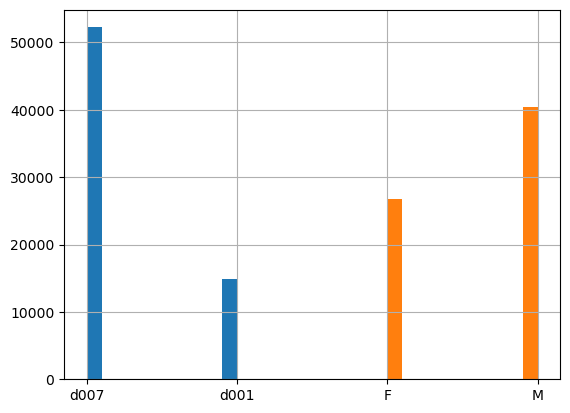

In [432]:
gen_emp.dept_no.hist()
gen_emp.gender.hist()
plt.show()

## Establish Hypothesis

$H_O$: Dept and Gender are not independent of each other

$H_a$: Dept and Gender are independent of each other

In [434]:
alpha

0.05

## Verify Assumptions

Dept and Gender are both categorical values, process with CHI2 test

## Compute

discrete - discrete = chi 2

discrete - continouts = means test

continous - continous = correlation

In [436]:
# crosstab = contingency table
observed = pd.crosstab(gen_emp.dept_no, gen_emp.gender)
observed

gender,F,M
dept_no,,
d001,5864,8978
d007,20854,31391


In [437]:
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [438]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 5864  8978]
 [20854 31391]]

Expected
[[ 5910  8931]
 [20807 31437]]

----
chi^2 = 0.7793
p     = 0.3774


dept_no = d001 = Marketing

dept_no = d007 = Sales

## Conclude

In [439]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null



Is an employee's gender independent of whether or not they are or have been a manager?

In [529]:
gen_mgr = pd.read_sql('''select emp_no, gender, dept_no
from employees e
left join dept_manager using (emp_no)
''', url_emp)

In [530]:
gen_mgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [531]:
gen_mgr.dept_no = gen_mgr.dept_no.fillna('not manager')

In [533]:
gen_mgr.dept_no.unique()

array(['not manager', 'manager'], dtype=object)

In [532]:
gen_mgr.dept_no = np.where(gen_mgr.dept_no != 'not manager', 'manager', 'not manager') #else cond it 2nd not manager

In [534]:
gen_mgr.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64


## Plot distributions

In [536]:
# NOPE

## Establish Hypothesis

$H_O$: Has or is a manager and Gender are not independent of each other

$H_a$: Has or is a manager and Gender are independent of each other

In [458]:
alpha

0.05

## Verify Assumptions

Small sample size, categorical variables, chi2 test!

## Compute

In [537]:
# crosstab = contingency table
observed = pd.crosstab(gen_mgr.dept_no, gen_mgr.gender)
observed

gender,F,M
dept_no,,
manager,13,11
not manager,120038,179962


In [538]:
# chi2 test
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [539]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[    13     11]
 [120038 179962]]

Expected
[[     9     14]
 [120041 179958]]

----
chi^2 = 1.4567
p     = 0.2275


## Conclude

In [540]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

we fail to reject the null


In [573]:
def chi2_test(table):
    α = 0.05
    chi2, pval, degf, expected = stats.chi2_contingency(table)
    print('Observed')
    print(observed.values)
    print('\nExpected')
    print(expected.astype(int))
    print('\n----')
    print(f'chi^2 = {chi2:.4f}')
    print(f'p-value = {pval:.4f}')
    print('\n----')
    if pval < α:
        print ('We reject the null hypothesis.')
    else:
        print ("We fail to reject the null hypothesis.")

In [574]:
chi2_test(observed)

Observed
[[    13     11]
 [120038 179962]]

Expected
[[     9     14]
 [120041 179958]]

----
chi^2 = 1.4567
p-value = 0.2275

----
We fail to reject the null hypothesis.


# Working Area

In [618]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9.044207,Yes,No,Yes,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9.055092,Yes,Yes,Yes,No,...,No,No,No,Yes,1,No,2,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,3.800406,Yes,No,Yes,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,12.631122,Yes,No,Yes,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3.187128,Yes,No,Yes,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.40,Yes


In [630]:
def conclude_1samp(group1, group_mean):
    α = 0.05
    tstat, p = stats.ttest_1samp(group1, group_mean)
    print(f't-stat')
    print(tstat)
    print(f'P-Value')
    print(p)
    print('\n----')
    if ((p < α) and (tstat > 0)):
        print("we can reject the null hypothesis.")
    else:
        print('We fail to reject the null hypothesis.')

In [631]:
conclude_1samp(df.monthly_charges, df.total_charges.mean())

t-stat
-6187.61088917162
P-Value
0.0

----
We fail to reject the null hypothesis.


In [632]:
tstat, p = stats.ttest_1samp(df.monthly_charges, df.tenure.mean())
tstat, p

(90.19117387663319, 0.0)